#Univariate Analysis

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#read data

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41.0,0.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Check null

In [6]:
df.isna().sum()

age         4
gender      4
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.isna().mean()

age         0.013201
gender      0.013201
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.000000
thal        0.000000
target      0.000000
dtype: float64

#Drop rows where gender is null

In [8]:
df = df.dropna(subset=['gender'])

#Fill age null with average age

In [9]:
df['age']=df['age'].fillna(int(df['age'].mean()))

#filter  data with numerical columns

In [10]:
cols = ["age","trestbps","chol","thalach","oldpeak"]

In [11]:
df_num = df[cols]

In [12]:
df_num.head()

,age,trestbps,chol,thalach,oldpeak
0,63.0,145,233,150,2.3
1,37.0,130,250,187,3.5
2,41.0,130,204,172,1.4
3,56.0,120,236,178,0.8
4,57.0,120,354,163,0.6


#Plot distribution plot for age and chol

<ipython-input-13-ab9d725e7617>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num['age'], color='g', bins=100)


<Axes: xlabel='age', ylabel='Density'>

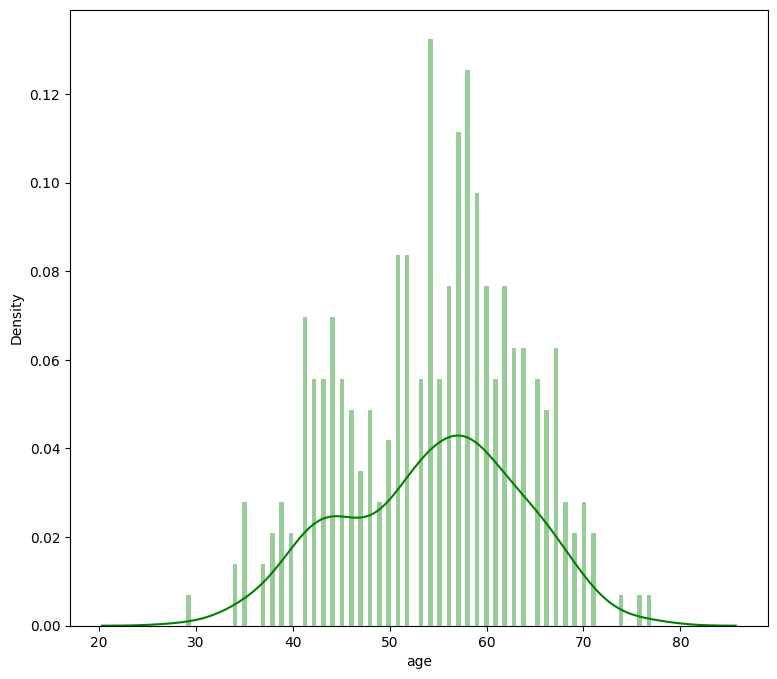

In [13]:
plt.figure(figsize=(9, 8))
sns.distplot(df_num['age'], color='g', bins=100)

<ipython-input-14-63ba663c5faf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num['chol'], color='r', bins=100)


<Axes: xlabel='chol', ylabel='Density'>

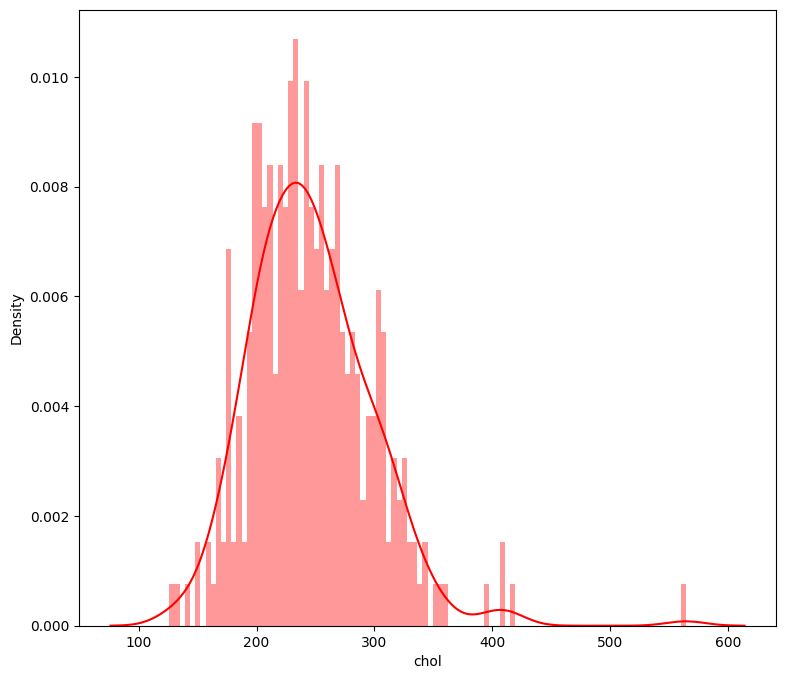

In [14]:
plt.figure(figsize=(9, 8))
sns.distplot(df_num['chol'], color='r', bins=100)

#Plot distribution plot for all numerical columns

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

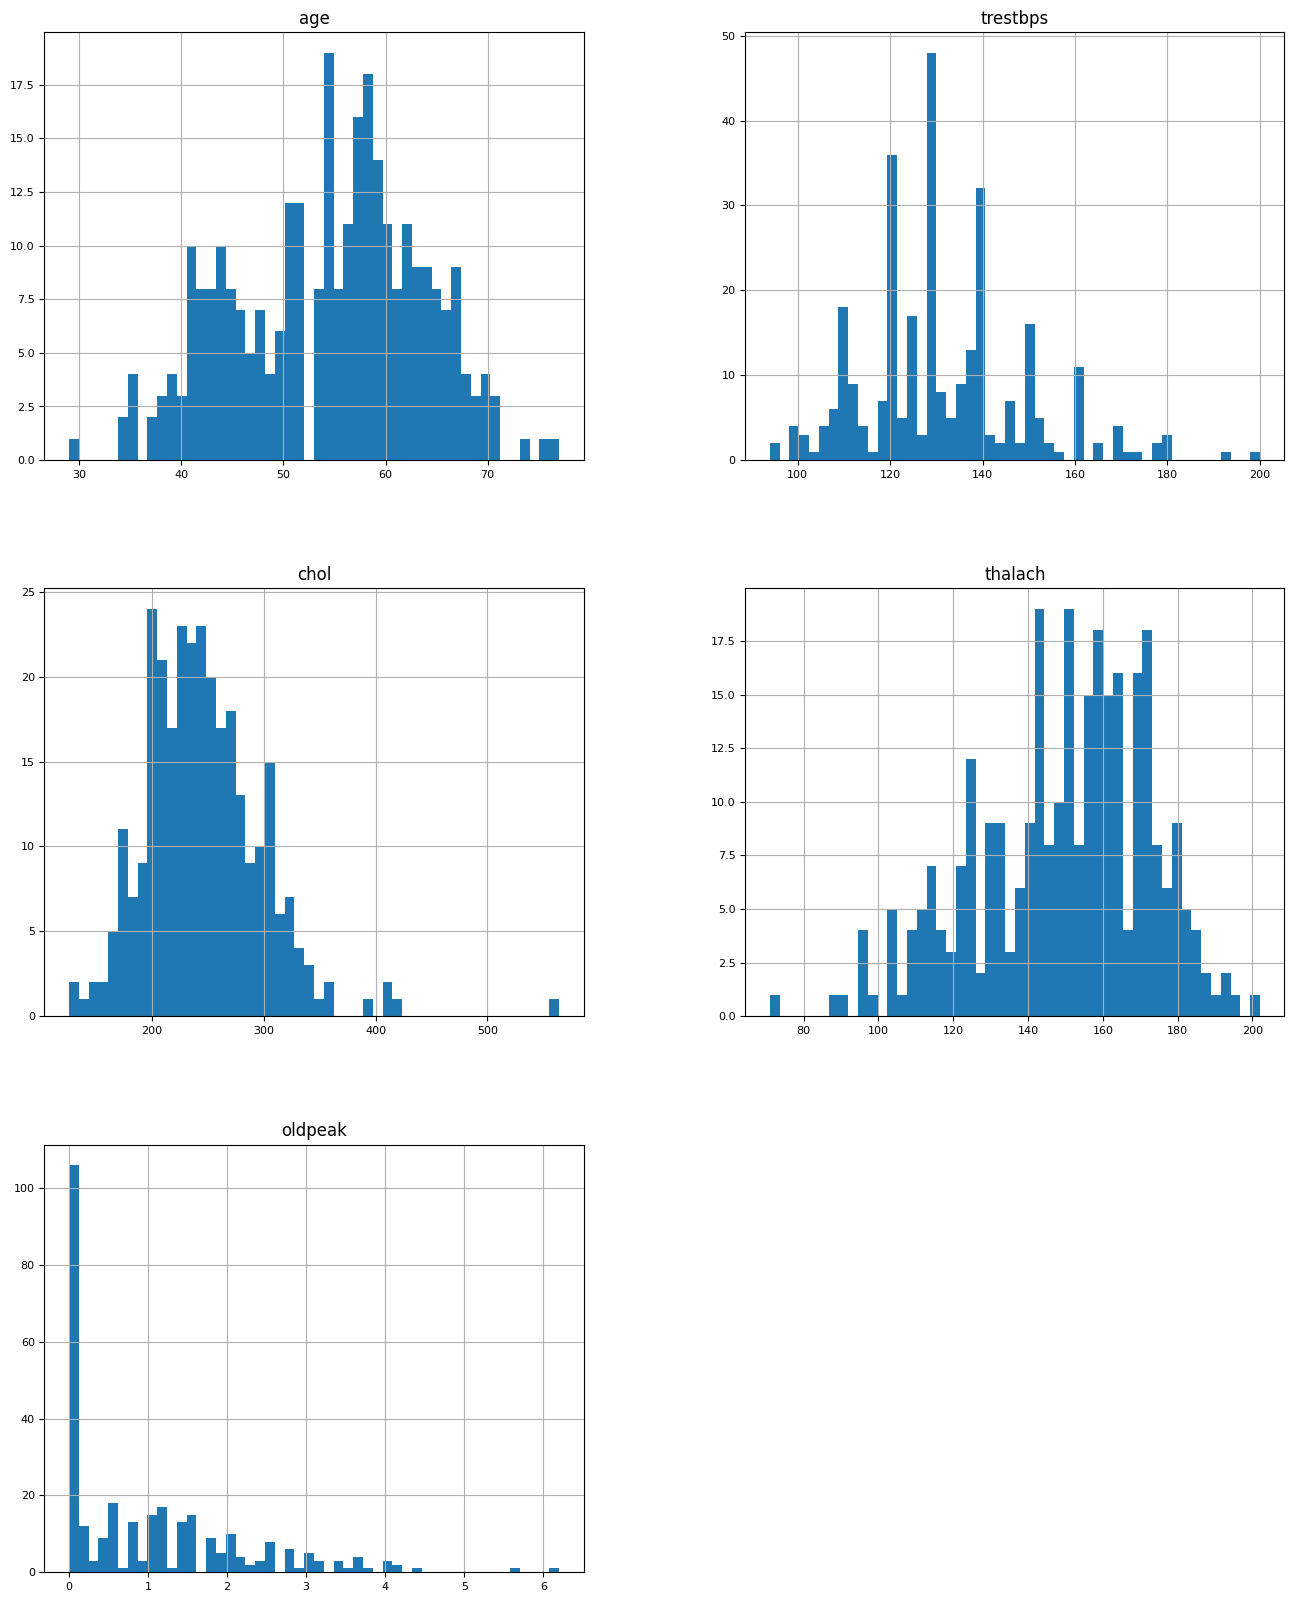

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

#PDF -- CDF

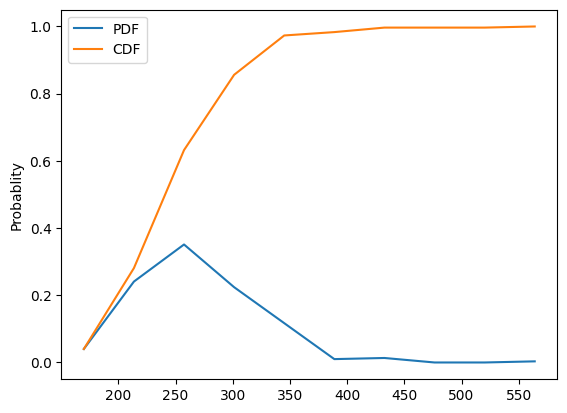

In [16]:
counts, bin_edges = np.histogram(df_num['chol'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
a , =plt.plot(bin_edges[1:],pdf);
b , =plt.plot(bin_edges[1:], cdf)
plt.ylabel("Probablity")
plt.legend([a,b],['PDF','CDF'])
plt.show()

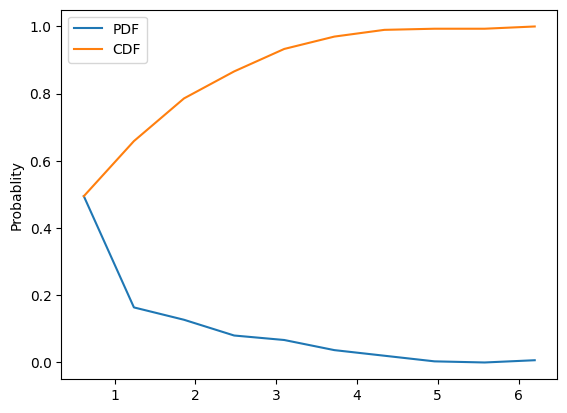

In [17]:
counts, bin_edges = np.histogram(df_num['oldpeak'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
a , =plt.plot(bin_edges[1:],pdf);
b , =plt.plot(bin_edges[1:], cdf)
plt.ylabel("Probablity")
plt.legend([a,b],['PDF','CDF'])
plt.show()

#Filter  data with categorical columns

In [18]:
cat_col =["gender","cp","fbs","restecg","exang","slope","ca","thal","target"]

In [19]:
df_cat = df[cat_col]

In [20]:
df_cat['gender'].value_counts()

1.0    205
0.0     94
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

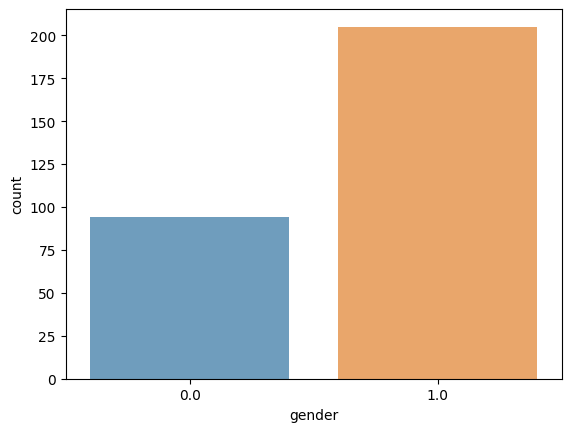

In [21]:
sns.countplot(x=df_cat['gender'], alpha=0.7, data=df)

In [22]:
df_cat['cp'].value_counts()

0    143
2     86
1     49
3     21
Name: cp, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

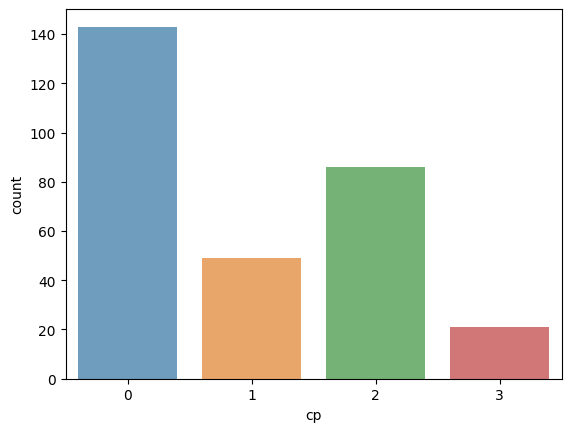

In [23]:
sns.countplot(x=df_cat['cp'], alpha=0.7, data=df)

In [24]:
df_cat['fbs'].value_counts()

0    255
1     44
Name: fbs, dtype: int64

<Axes: xlabel='fbs', ylabel='count'>

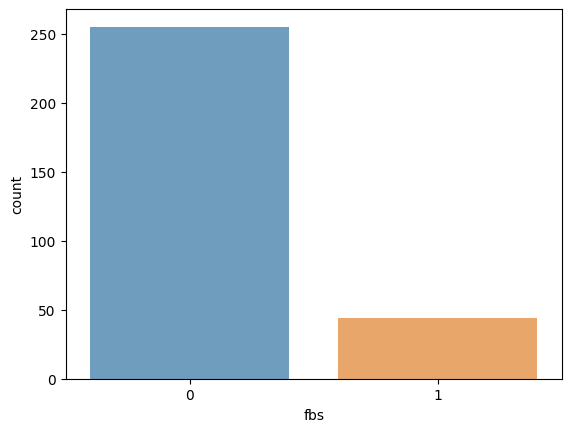

In [25]:
sns.countplot(x=df_cat['fbs'], alpha=0.7, data=df)

In [26]:
df_cat['restecg'].value_counts()

1    150
0    145
2      4
Name: restecg, dtype: int64

<Axes: xlabel='restecg', ylabel='count'>

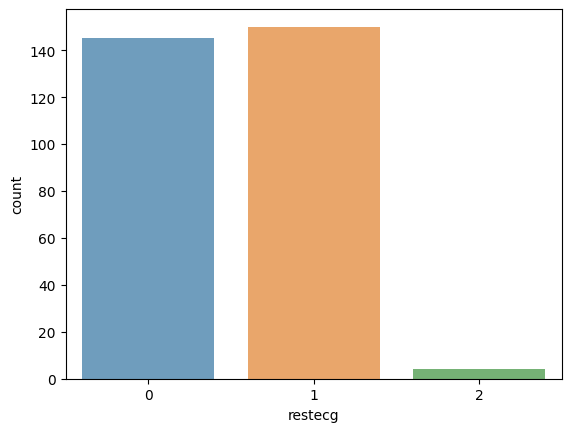

In [27]:
sns.countplot(x=df_cat['restecg'], alpha=0.7, data=df)

In [28]:
df_cat['exang'].value_counts()

0    201
1     98
Name: exang, dtype: int64

<Axes: xlabel='exang', ylabel='count'>

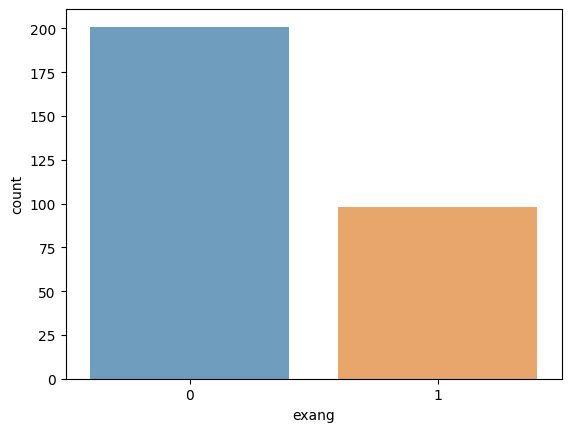

In [29]:
sns.countplot(x=df_cat['exang'], alpha=0.7, data=df)

In [30]:
df_cat['slope'].value_counts()

2    140
1    138
0     21
Name: slope, dtype: int64

<Axes: xlabel='slope', ylabel='count'>

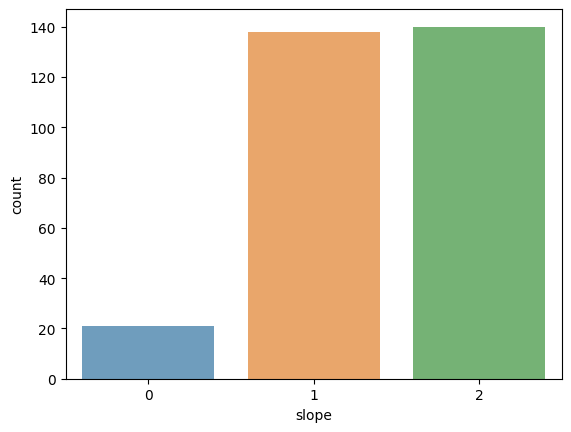

In [31]:
sns.countplot(x=df_cat['slope'], alpha=0.7, data=df)

In [32]:
df_cat['ca'].value_counts()

0    171
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

<Axes: xlabel='ca', ylabel='count'>

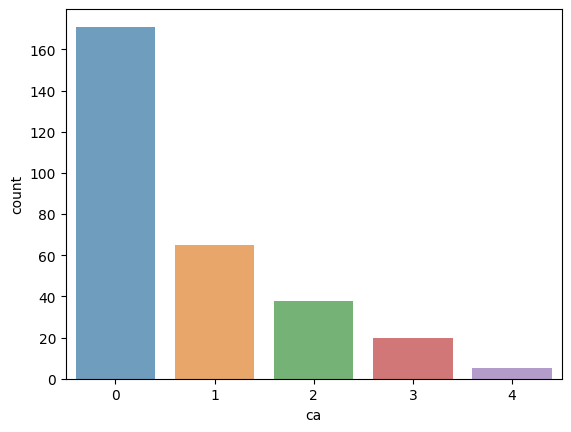

In [33]:
sns.countplot(x=df_cat['ca'], alpha=0.7, data=df)

In [34]:
df_cat['thal'].value_counts()

2    162
3    117
1     18
0      2
Name: thal, dtype: int64

<Axes: xlabel='thal', ylabel='count'>

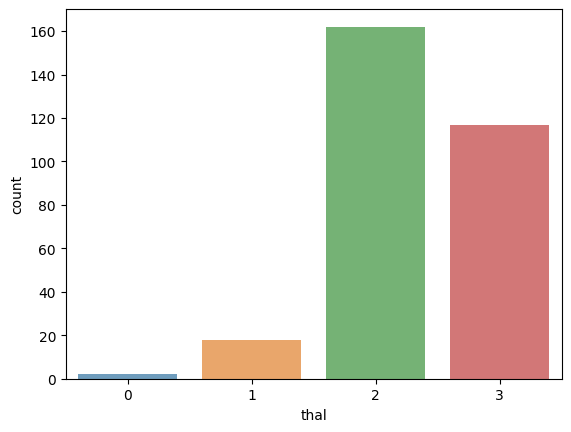

In [35]:
sns.countplot(x=df_cat['thal'], alpha=0.7, data=df)

In [36]:
df_cat['target'].value_counts()

1    161
0    138
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

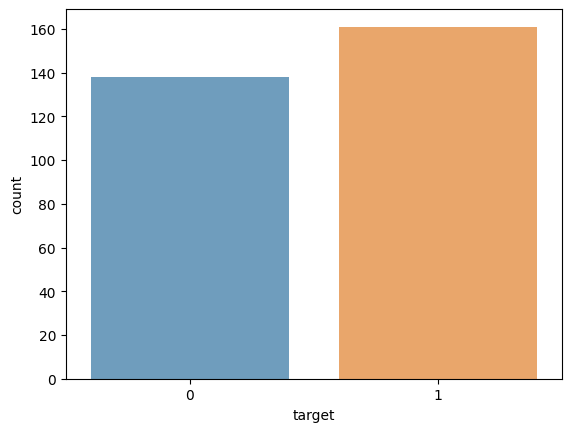

In [37]:
sns.countplot(x=df_cat['target'], alpha=0.7, data=df)

#PIE CHART

<Axes: ylabel='None'>

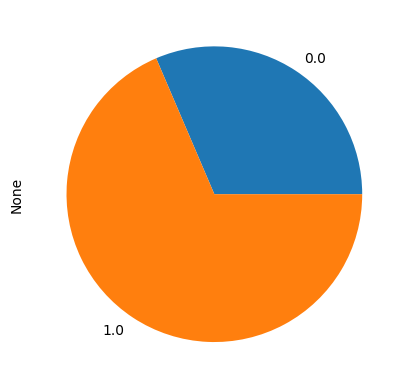

In [38]:
df.groupby(['gender']).size().plot(kind='pie')

# **#Bivariate analysis   (DAY = 16)**

#SCATTERPLOT

<Axes: xlabel='age', ylabel='chol'>

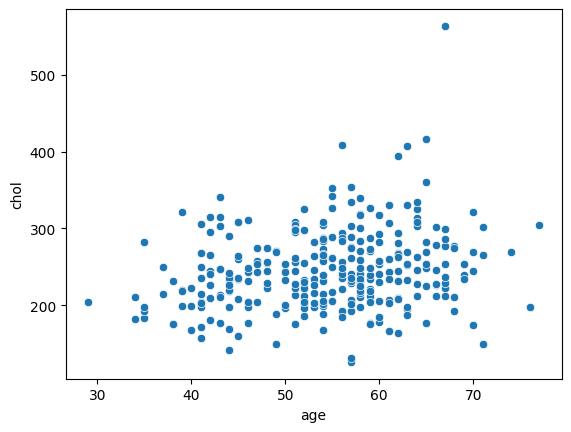

In [39]:
|sns.scatterplot(data=df_num, x= 'age', y='chol')

<Axes: xlabel='age', ylabel='trestbps'>

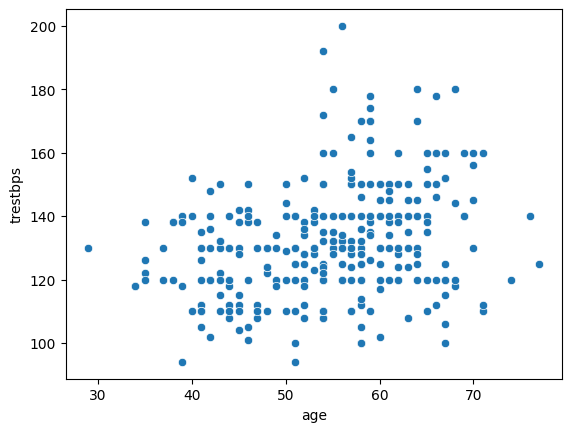

In [42]:
sns.scatterplot(data=df_num, x= 'age', y='trestbps')

<Axes: xlabel='trestbps', ylabel='chol'>

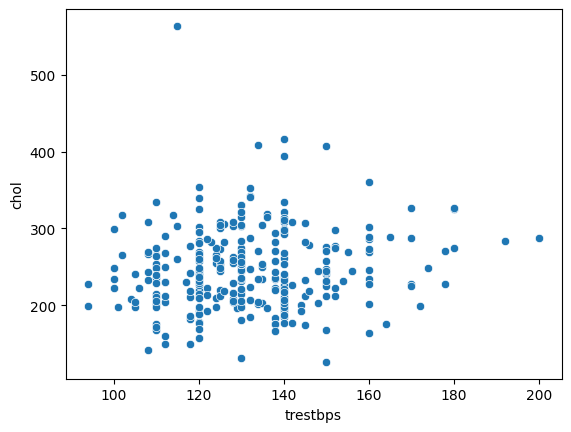

In [43]:
sns.scatterplot(data=df_num, x= 'trestbps', y='chol')

<Figure size 896x672 with 0 Axes>

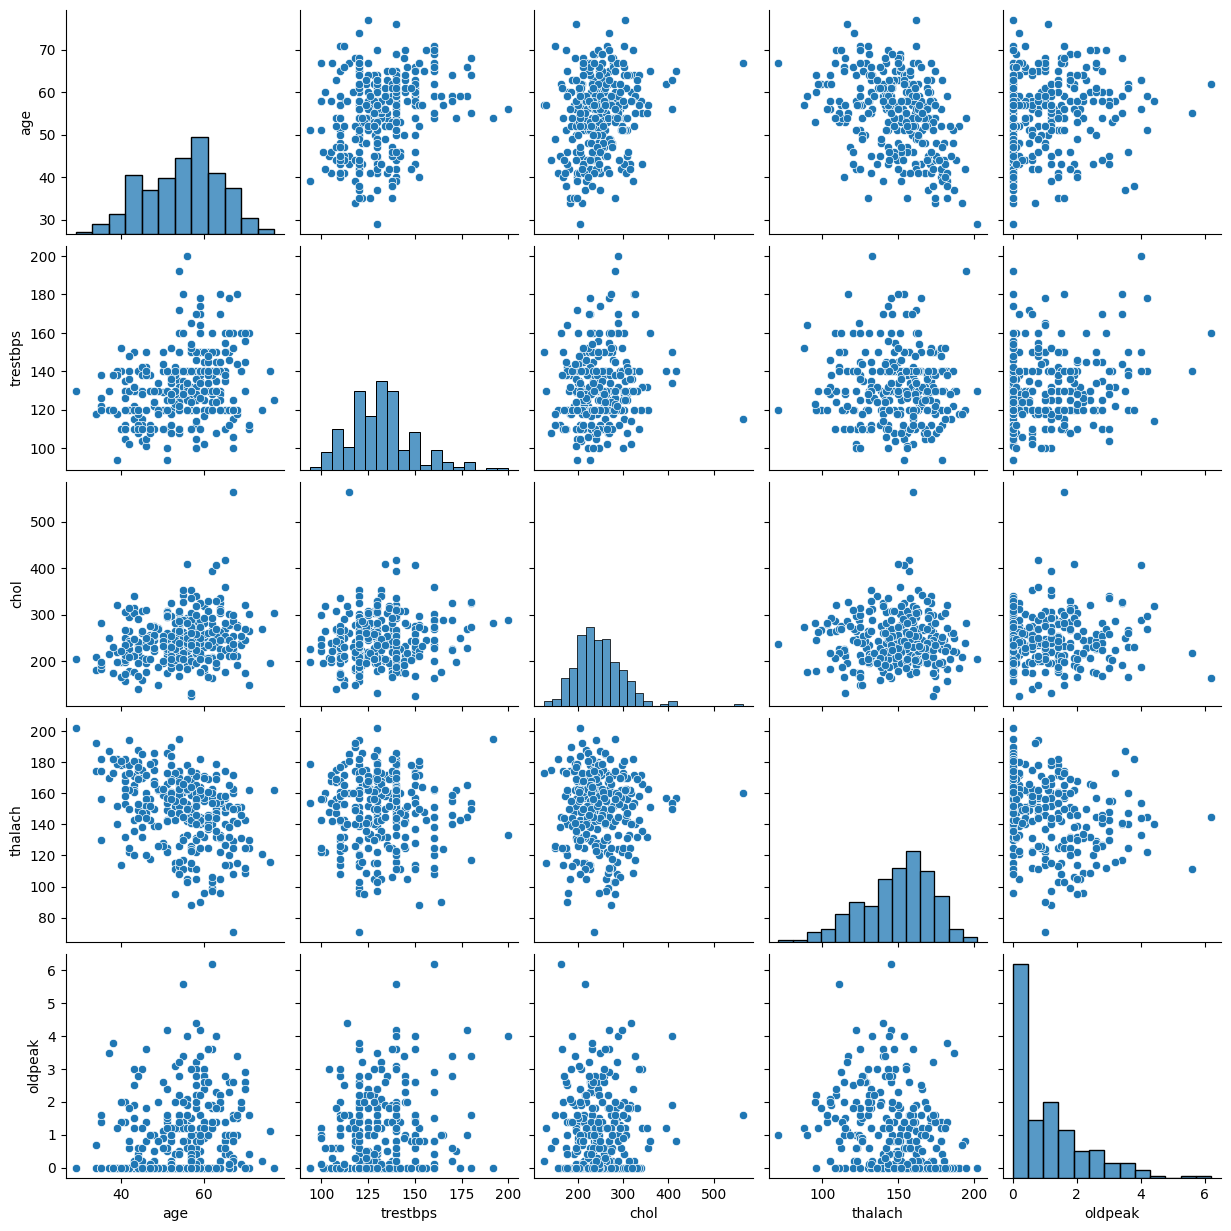

In [44]:
plt.figure(dpi=140)
sns.pairplot(df_num)
plt.show()

In [45]:
df_cat.head()

,gender,cp,fbs,restecg,exang,slope,ca,thal,target
0,1.0,3,1,0,0,0,0,1,1
1,1.0,2,0,1,0,0,0,2,1
2,0.0,1,0,0,0,2,0,2,1
3,1.0,1,0,1,0,2,0,2,1
4,0.0,0,0,1,1,2,0,2,1


#BARPLOT

In [56]:
|df_cat['trestbps'] = df['trestbps']

<ipython-input-56-9771ab7543af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['trestbps'] = df['trestbps']


In [57]:
df_cat['chol'] = df['chol']

<ipython-input-57-990d33cf29b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['chol'] = df['chol']


In [58]:
df_cat.head()

,gender,cp,fbs,restecg,exang,slope,ca,thal,target,trestbps,chol
0,1.0,3,1,0,0,0,0,1,1,145,233
1,1.0,2,0,1,0,0,0,2,1,130,250
2,0.0,1,0,0,0,2,0,2,1,130,204
3,1.0,1,0,1,0,2,0,2,1,120,236
4,0.0,0,0,1,1,2,0,2,1,120,354


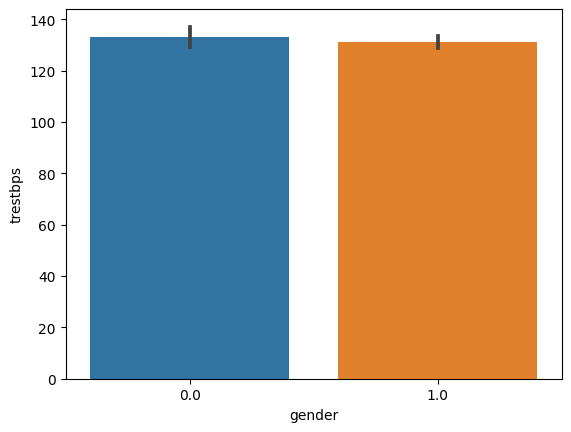

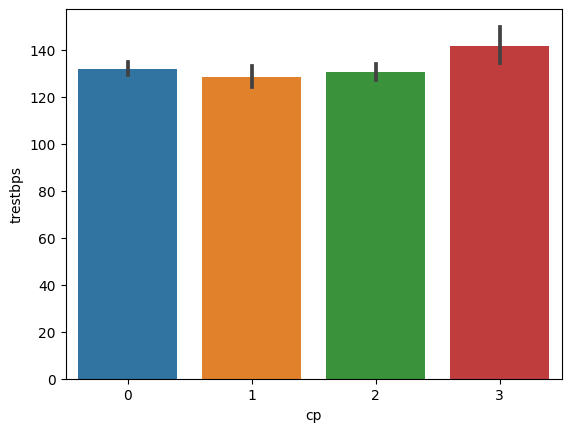

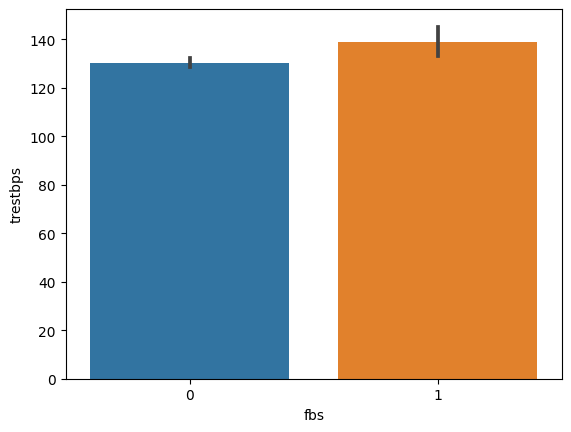

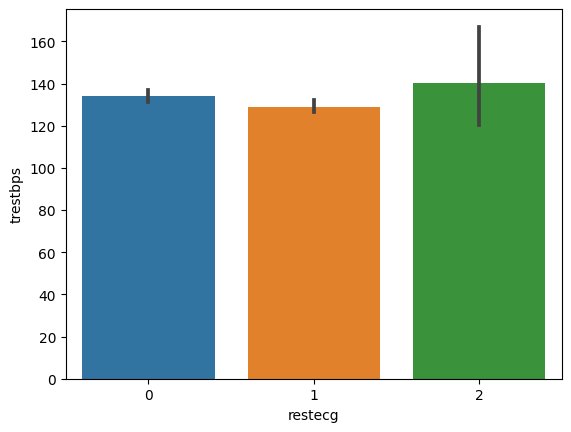

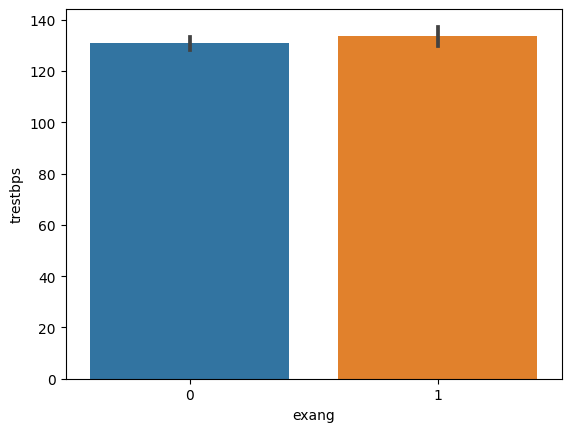

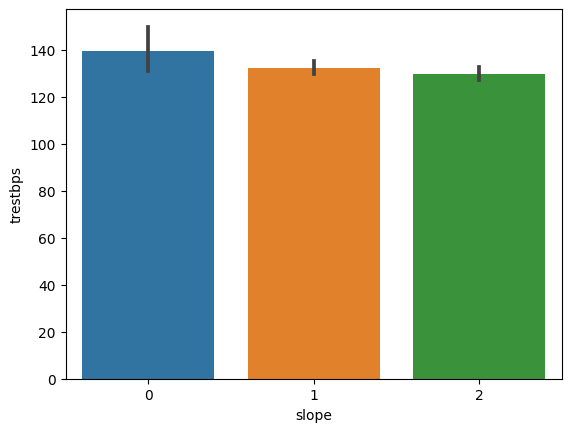

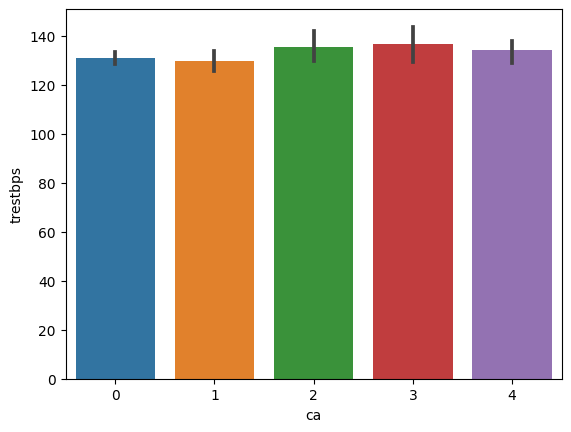

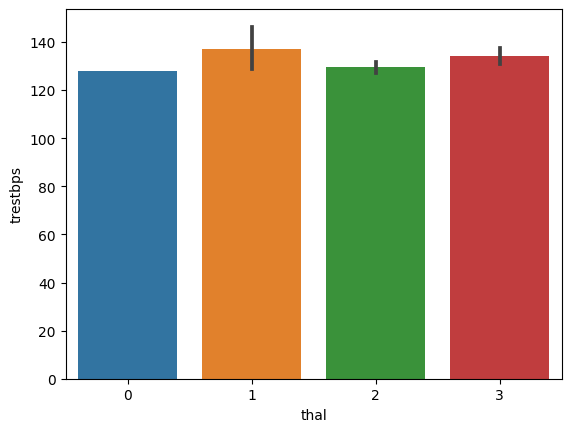

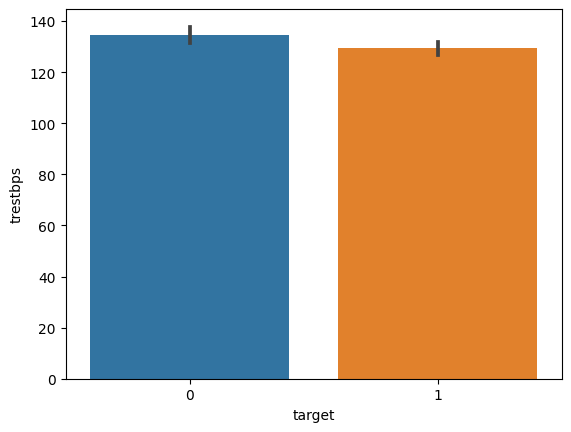

In [64]:
for i in cat_col:
  sns.barplot(x= i ,y='trestbps',data=df)
  plt.show()

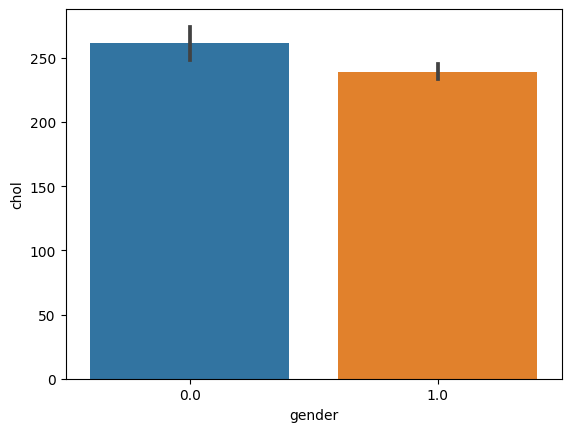

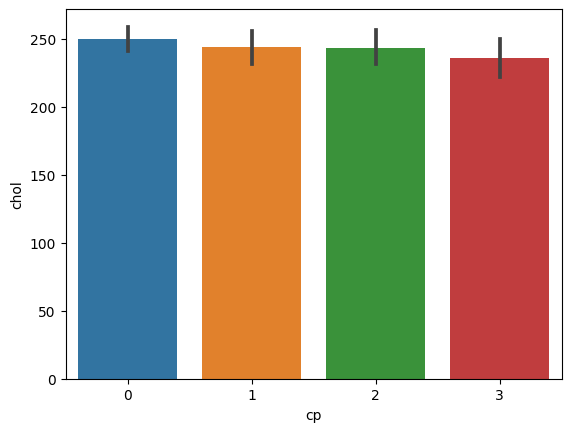

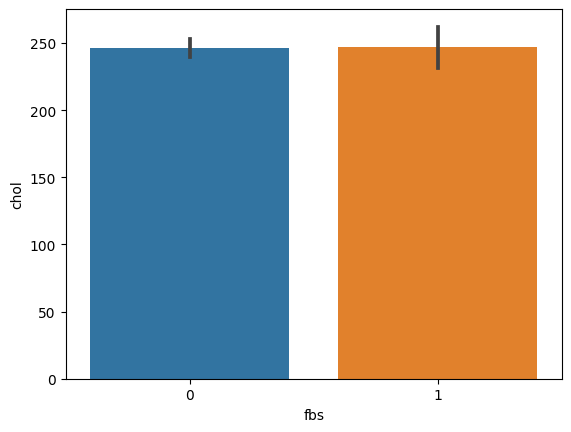

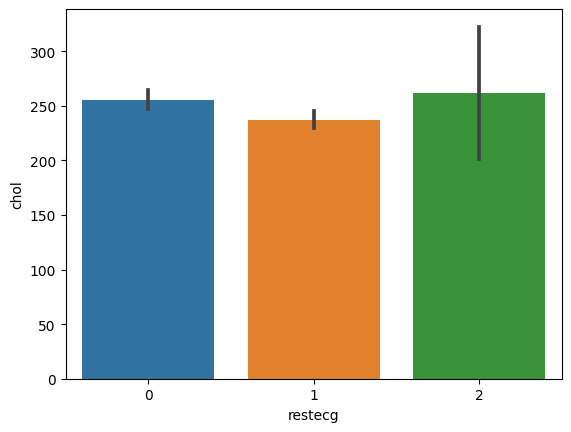

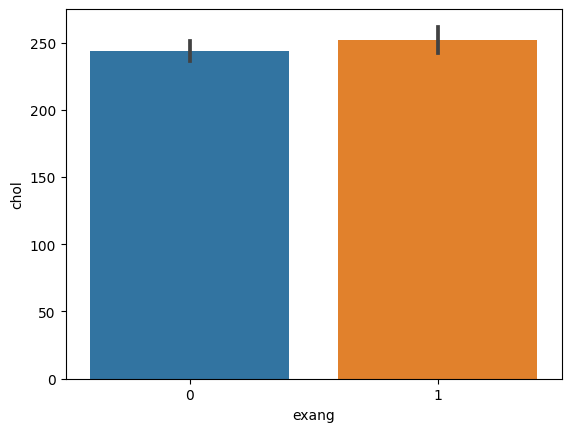

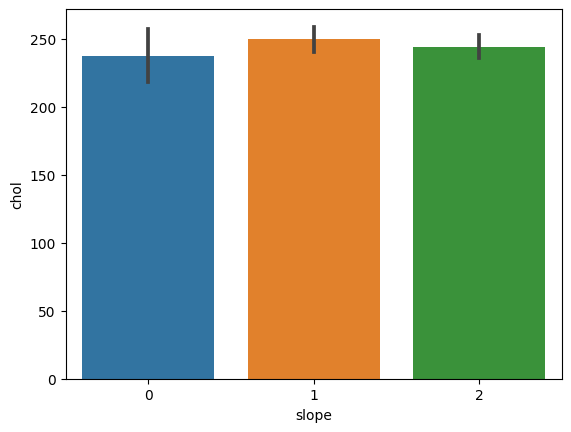

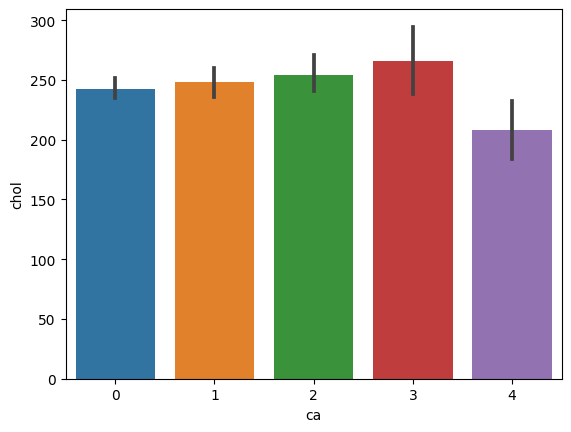

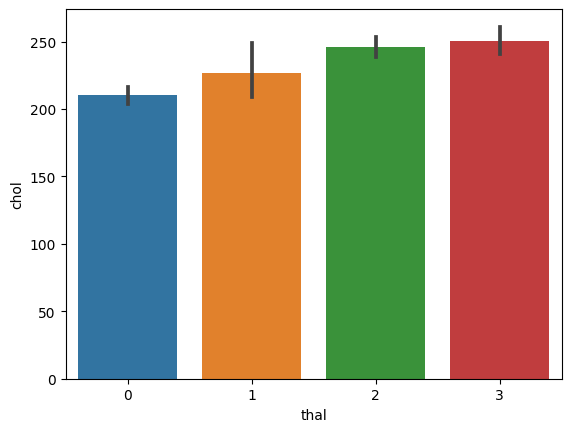

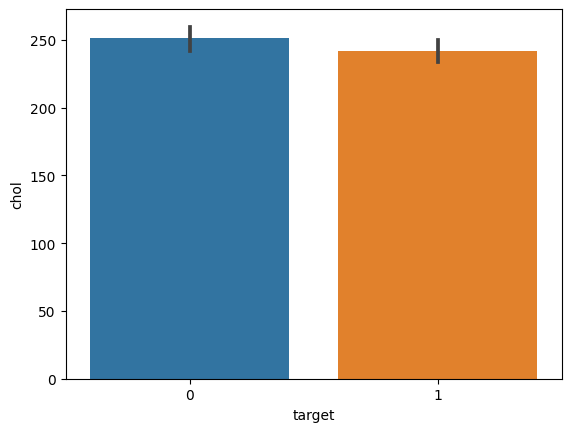

In [65]:
for i in cat_col:
  sns.barplot(x= i ,y='chol',data=df)
  plt.show()